In [1]:
import pymc3 as pm
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np

In [33]:
def addDateIndex(df, maxDate = None, minDate = None, fill_value = 0):
    #minDate = SP_Day['delivered'].min()
    if(maxDate == None):
        maxDate = df['date'].max()
        
    if(minDate == None):
        minDate = df['date'].min()

    idx = pd.date_range(minDate, maxDate)


    df = df.set_index('date')
    df.index = pd.DatetimeIndex(df.index)
    df = df.reindex(idx, fill_value=fill_value)
    return df


In [72]:

finishedItems = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/DeliveredItems.csv")
finishedItems.columns = ['date', 'finishedCount']
finishedItems = addDateIndex(finishedItems)
finishedItems.head()

,finishedCount
2018-11-01,1
2018-11-02,1
2018-11-03,0
2018-11-04,0
2018-11-05,0


In [150]:
finishedItemsJuly = finishedItems['20190701':'20190731']
finishedItemsJuly['cumsum'] = finishedItemsJuly['finishedCount'].cumsum()
finishedItemsJuly['WEEKDAY'] = ((pd.DatetimeIndex(finishedItemsJuly.index).dayofweek) // 5 == 0).astype(float)
finishedItemsJuly['day'] = 1
finishedItemsJuly['day'] = finishedItemsJuly['day'].cumsum()
finishedItemsJuly['work_day'] = finishedItemsJuly['WEEKDAY'].cumsum()


finishedItemsJuly

/miniconda3/envs/bayes-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/miniconda3/envs/bayes-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/miniconda3/envs/bayes-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,finishedCount,cumsum,WEEKDAY,day,work_day
2019-07-01,1,1,1.0,1,1.0
2019-07-02,0,1,1.0,2,2.0
2019-07-03,3,4,1.0,3,3.0
2019-07-04,0,4,1.0,4,4.0
2019-07-05,2,6,1.0,5,5.0
2019-07-06,0,6,0.0,6,5.0
2019-07-07,0,6,0.0,7,5.0
2019-07-08,0,6,1.0,8,6.0
2019-07-09,0,6,1.0,9,7.0
2019-07-10,1,7,1.0,10,8.0


In [151]:
#real troughput
troughput_july = round(finishedItemsJuly.finishedCount.sum() / finishedItemsJuly.work_day.max(), 2) 
print('troughput in July', troughput_july)

troughput in July 0.96


In [152]:
finishedItemsJuly['est_finished'] = finishedItemsJuly['work_day'] / troughput_july
finishedItemsJuly.head(48)

/miniconda3/envs/bayes-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,finishedCount,cumsum,WEEKDAY,day,work_day,est_finished
2019-07-01,1,1,1.0,1,1.0,1.041667
2019-07-02,0,1,1.0,2,2.0,2.083333
2019-07-03,3,4,1.0,3,3.0,3.125000
2019-07-04,0,4,1.0,4,4.0,4.166667
2019-07-05,2,6,1.0,5,5.0,5.208333
2019-07-06,0,6,0.0,6,5.0,5.208333
2019-07-07,0,6,0.0,7,5.0,5.208333
2019-07-08,0,6,1.0,8,6.0,6.250000
2019-07-09,0,6,1.0,9,7.0,7.291667
2019-07-10,1,7,1.0,10,8.0,8.333333


In [34]:
wipObservations = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/InProgressObservations.csv")
wipObservations.head()

wipObservations = addDateIndex(wipObservations)


wipObservations.tail()

,SP_count
2019-11-21,6
2019-11-22,6
2019-11-23,5
2019-11-24,5
2019-11-25,6


In [107]:
wipObservationsJune = wipObservations['20190601':'20190630']
wipObservationsJune.head()
wipAvg = wipObservationsJune.SP_count.mean()
print('avg wip', wipAvg)

avg wip 8.133333333333333


In [5]:
cycleObservations = pd.read_csv("/Users/robertk/Documents/GitHub/evolveNotebooks/Skeyos/DaysInDev.csv")

cycleObservations = cycleObservations[['in progress date max', 'days in dev', 'key']]
cycleObservations.columns = ['date', 'cycleTime', 'key']
cycleObservations = cycleObservations.sort_values(by=['date'])
#print (cycleObservations[cycleObservations.duplicated(subset=['date'],keep=False)])
#cycleObservations = addDateIndex(cycleObservations)
cycleObservations['date'] = pd.to_datetime(cycleObservations['date'])
cycleObservations.head()


,date,cycleTime,key
7,2019-01-08,32,MROMD-1585
24,2019-01-14,6,MROMD-2137
0,2019-01-15,4,MROMD-1177
30,2019-01-16,2,MROMD-2246
13,2019-01-16,6,MROMD-1957


In [142]:
cycleObservationsJune = cycleObservations.loc[(cycleObservations['date'] >= '2019-06-01') &
                                              (cycleObservations['date'] <= '2019-06-30'),]
cycleObservationsJune.loc[cycleObservations.cycleTime == 0, 'cycleTime'] = 0.5
#cycleObservationsJune

# observed cycle time for each day is needed
# average cycle time for days where more than 1 item is delivered
# for days where no item is delivered add an average cycle time from all observations

#avgCycle = cycleObservationsJune['cycleTime'].mean()
#cycleMedian = cycleObservationsJune['cycleTime'].median()
avgCycle = finishedItemsJuly['cumsum'].max() / wipAvg / len(finishedItemsJuly)

cycleObservationsJune = cycleObservationsJune.groupby('date').agg({'cycleTime': ['mean']})
cycleObservationsJune.columns = [' '.join(col).strip() for col in cycleObservationsJune.columns.values]
cycleObservationsJune.reset_index(inplace=True)



minDate = wipObservationsJune.index.min()
maxDate = wipObservationsJune.index.max()


cycleObservationsJune = addDateIndex(cycleObservationsJune, maxDate = maxDate, minDate=minDate, fill_value=0)
cycleObservationsJune.columns = ['cycleTime']
cycleObservationsJune


/miniconda3/envs/bayes-env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,cycleTime
2019-06-01,0.00
2019-06-02,0.00
2019-06-03,0.00
2019-06-04,3.00
2019-06-05,0.00
2019-06-06,0.75
2019-06-07,0.00
2019-06-08,0.00
2019-06-09,0.00
2019-06-10,0.00


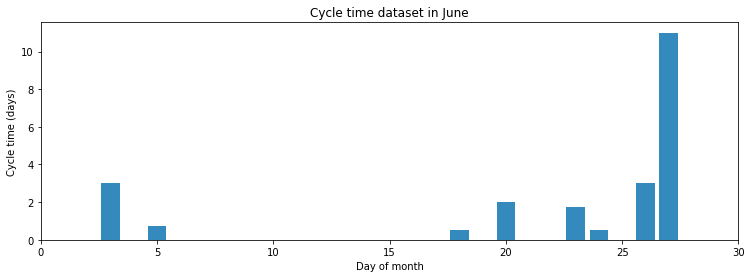

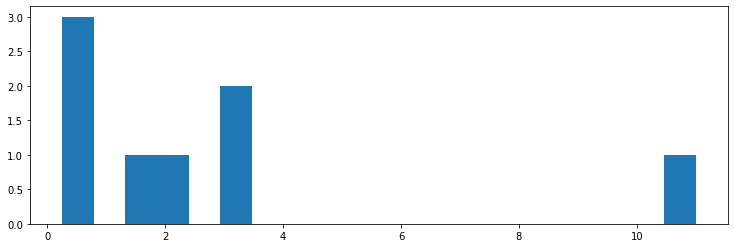

In [177]:
data = cycleObservationsJune.cycleTime
_= plt.bar(np.arange(len(data)), data, color="#348ABD")
_= plt.xlabel("Day of month")
_= plt.ylabel("Cycle time (days)")
_= plt.title("Cycle time dataset in June")
_= plt.xlim(0, len(data))
#plt.legend();
_= plt.show()

# figsize(12.5, 4)
#cycleObservationsJune.head()
_= plt.hist(data, bins=20, range=(0.25,data.max()))
#plt.legend();

No handles with labels found to put in legend.


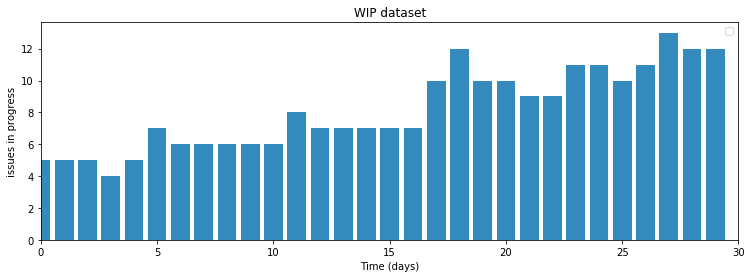

In [144]:
data = wipObservationsJune.SP_count
plt.bar(np.arange(len(data)), data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("issues in progress")
plt.title("WIP dataset")
plt.xlim(0, len(data))
plt.legend();

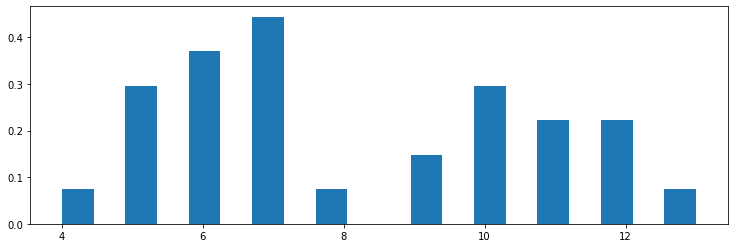

In [145]:
figsize(12.5, 4)
_=plt.hist(wipObservationsJune.SP_count, bins=20, histtype="stepfilled", density=True)

# # Plot the PDF.
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 100)
# #p = stats.poisson.pmf(x, mu)
# #plt.plot(x, p, 'k', linewidth=2)
# plt.title("Artificial wip histogram")
# plt.show()

#print("wip mean", wipData.mean())

In [146]:
# # Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
# with pm.Model() as model_1:

#     troughput = pm.Normal("troughput", 1,0.5)
    
    
    
    
#     #mu_cycle = pm.Normal("mu_cycle", 5, 2)
#     #sigma_cycle = pm.Uniform("sigma_cycle", 0, 5)
    
#     mu_cycle = pm.Poisson("mu_cycle", 5, observed = cycleObservationsJune.cycleTime)
#     mu_wip = pm.Deterministic("mu_wip", troughput * mu_cycle)
#     sigma_wip = pm.Uniform('sigma_wip', 0,10)

#     wip = pm.Normal("wip", mu=mu_wip, sigma=sigma_wip, observed=wipObservationsJune.SP_count)
    
# #     mu_delivered = pm.Deterministic("mu_delivered", finishedItemsJuly.day / troughput )
# #     delivered = pm.Poisson("delivered", mu_delivered, observed=finishedItemsJuly.finishedCount)
    
    
#     trace = pm.sample(10000, tune=1000) 
    
    

#     # To be explained in chapter 3.
# #     step = pm.Metropolis()
# #     trace = pm.sample(10000, step=step)
# #     burned_trace=trace[1000:]

In [168]:
# Set up the pymc3 model. Again assume Uniform priors for p_A and p_B.
with pm.Model() as model_2:

    troughput = pm.Normal("troughput", 1,0.5)
    
    
    
    
    #mu_cycle = pm.Normal("mu_cycle", 5, 2)
    #sigma_cycle = pm.Uniform("sigma_cycle", 0, 5)
    
    mu_cycle = pm.Poisson("mu_cycle", 5, observed = cycleObservationsJune.cycleTime)
    mu_wip = pm.Deterministic("mu_wip", troughput * mu_cycle)
    sigma_wip = pm.Uniform('sigma_wip', 0,10)

    wip = pm.Normal("wip", mu=mu_wip, sigma=sigma_wip, observed=wipObservationsJune.SP_count)
    mu_eta_workDays = pm.Deterministic("mu_eta_workDays", 22 / troughput)
    sigma_eta_workdays = pm.Normal("sigma_eta_workdays", 2, 10)
    eta_workdays = pm.Normal("eta_workdays", mu = mu_eta_workDays, sigma = sigma_eta_workdays)
    

    
#     mu_delivered = pm.Deterministic("mu_delivered", finishedItemsJuly.day / troughput )
#     delivered = pm.Poisson("delivered", mu_delivered, observed=finishedItemsJuly.finishedCount)
    
    
    trace = pm.sample(10000, tune=1000) 
    
    

    # To be explained in chapter 3.
#     step = pm.Metropolis()
#     trace = pm.sample(10000, step=step)
#     burned_trace=trace[1000:]

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [eta_workdays, sigma_eta_workdays, sigma_wip, troughput]
Sampling 4 chains, 11,011 divergences: 100%|██████████| 44000/44000 [00:38<00:00, 1150.26draws/s]
There were 2439 divergences after tuning. Increase `target_accept` or reparameterize.
There were 2975 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6508283314197243, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2721 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6541366963579381, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2875 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7073993339

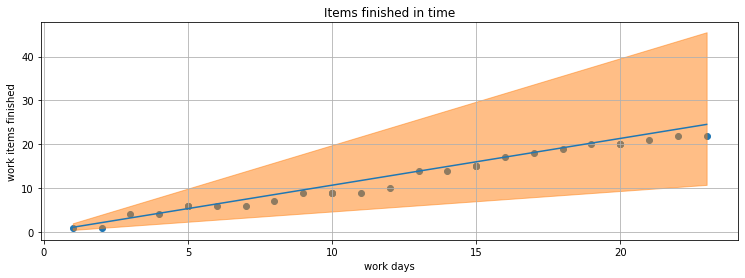

In [167]:
import arviz as az

items_avg = np.linspace(1, finishedItemsJuly['work_day'].max(), 100)

#mu_pred = trace_5_3['a'] + trace_5_3['bA'][:,0] * R_avg[:,None]
mu_pred =  items_avg[:,None] / trace['troughput'][::400]
#mu_pred =  finishedItemsJuly['work_day'][:, None] / trace['troughput'][::400]

#mu_calc = items_avg[:,None] / troughput_july

#print(mu_pred.shape)
#eta_ = stats.norm.rvs(mu_pred, trace['sigma_timeToFinish'][::400])


# mu_pred = mu_pred[::20]
# items_avg = items_avg[::20]


plt.scatter(finishedItemsJuly.work_day, finishedItemsJuly['cumsum'])
plt.plot(items_avg, mu_pred.mean(1), 'C0')
#plt.plot(items_avg, mu_calc, 'C1', color='green')
plt.grid()
az.plot_hpd(items_avg, mu_pred.T)
#az.plot_hpd(items_avg, eta_.T)

plt.xlabel('work days')
plt.ylabel('work items finished')
plt.title('Items finished in time');

array([<matplotlib.axes._subplots.AxesSubplot object at 0x135b34550>],
      dtype=object)

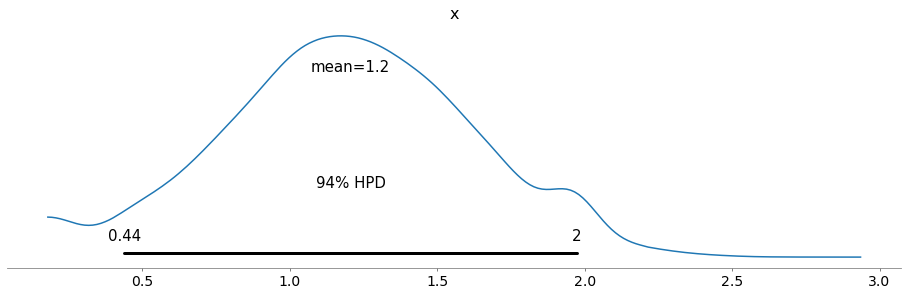

In [170]:
pm.plot_posterior( trace['troughput'], var_names= ['~mu_wip'])

In [171]:
trace['troughput'][::400].shape

(100,)

In [79]:
# print(len(finishedItemsJuly.day))
# print(len(finishedItemsJuly['cumsum']))

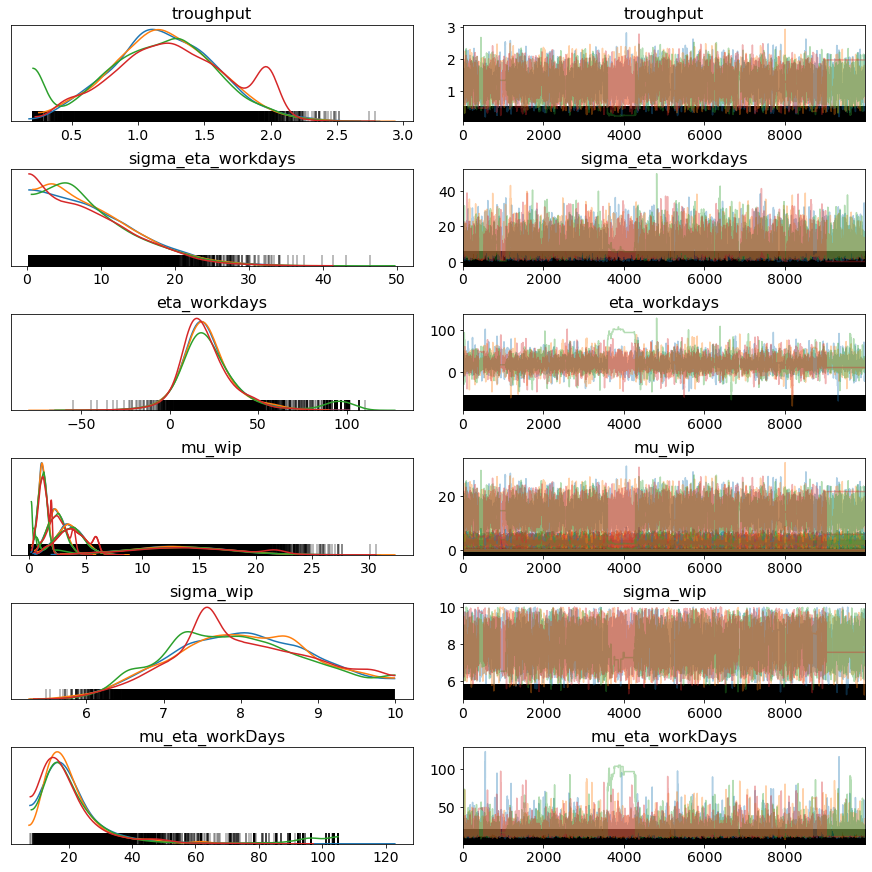

In [169]:
_=pm.traceplot(trace)

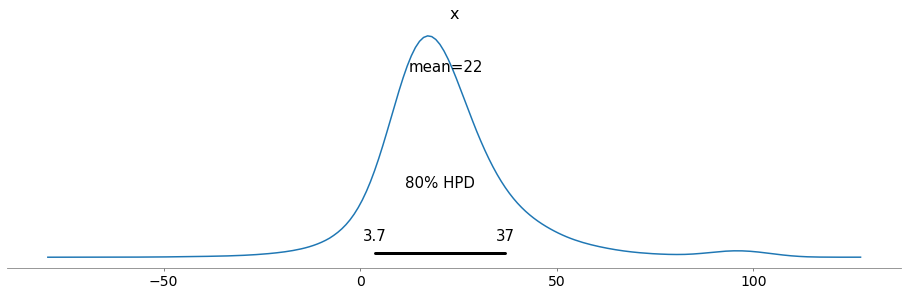

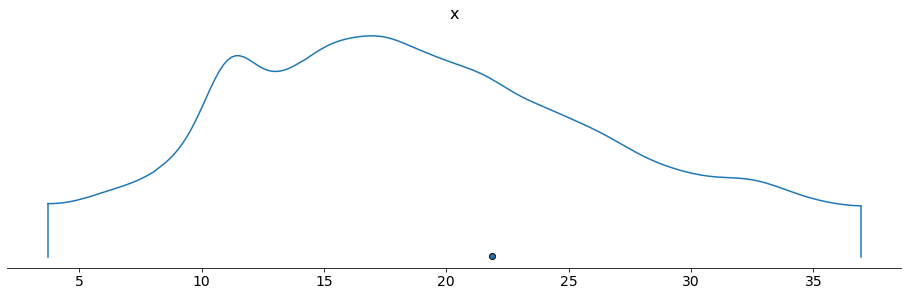

In [172]:
ax, = pm.plot_posterior( trace['eta_workdays'], credible_interval=0.8)
ax, = pm.densityplot( trace['eta_workdays'], credible_interval=0.80)
#ax.set_xlim(-5, 30000)

No handles with labels found to put in legend.


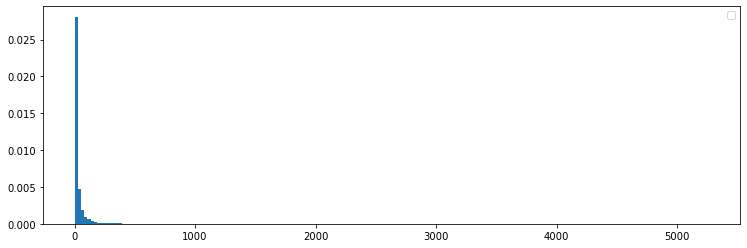

In [195]:
plt.hist(burned_trace['timeToFinish'], bins=200, histtype="stepfilled", density=True)
plt.legend();